# Decision Trees: Classification

### Importing the Required Libraries

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

### Loading the Dataset

The dataset we use to train the model is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

It consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [2]:
pima_dataset = pd.read_csv('diabetes.csv')
pima_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Feature Selection

Here we assign the relevent columns of data which will be used for training. Since we're predicting the outcome, all the columns are set as 'X' while the 'Outcome' is set as 'Y'. The dataset we created was a pandas dataframe, so we'll be using the "iloc" function to extract the data.

In [3]:
#Feature Selection
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree', 'age']
x = pima_dataset.iloc[:,0:8] #Feature variable
y = pima_dataset.iloc[:,-1] #Target variable

### Splitting the data

Testing is crucial for any machine learning model as it allows us to make changes and increase its accuracy. We divide our data into two different sets: "Test" and "Train" in a 7:3 ratio; 70% of the data will be used for training, while 20% will be used for testing.

To make sure the model is predicting the outcome on the basis of different dependencies of data and not just straight up learning it, we don't use testing data to fit the model. Finding out the accuracy using unseen data give us the true reading about the model trained.

Divvying out the data is easy thanks to the Scikit-learn library, which is used extensively in implementing data preprocessing techniques and machine leanring models itself.

In [4]:
#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=69)

### Creating the Model

Time to create the Decision Tree Model. We'll be using the Scikit-learn library to define, train, and predict the results of the model.

In [5]:
model = DecisionTreeClassifier()

### Training the Model

Next, we train the model using the one-liner code below.

In [6]:

model = model.fit(x_train, y_train)

### Predicting the model

Once the model is trained, we'll predict the "Outcome" using the test data.

In [7]:

y_pred = model.predict(x_test)

### Calculating Accuracy

The predictions will be pitted against the actual values to find out how good is the model.

In [8]:
#Evaluating the Model
acc = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy of the Decision Tree Classifier Model: {acc:.2f}')

Accuracy of the Decision Tree Classifier Model: 0.73


### Visualizing the Model

Once of best things about the Decision Trees is that it is a white box model where we get to know the actual internal working inside the model, unlike the neural networks. This means that we can easily visualize the model using some libraries.

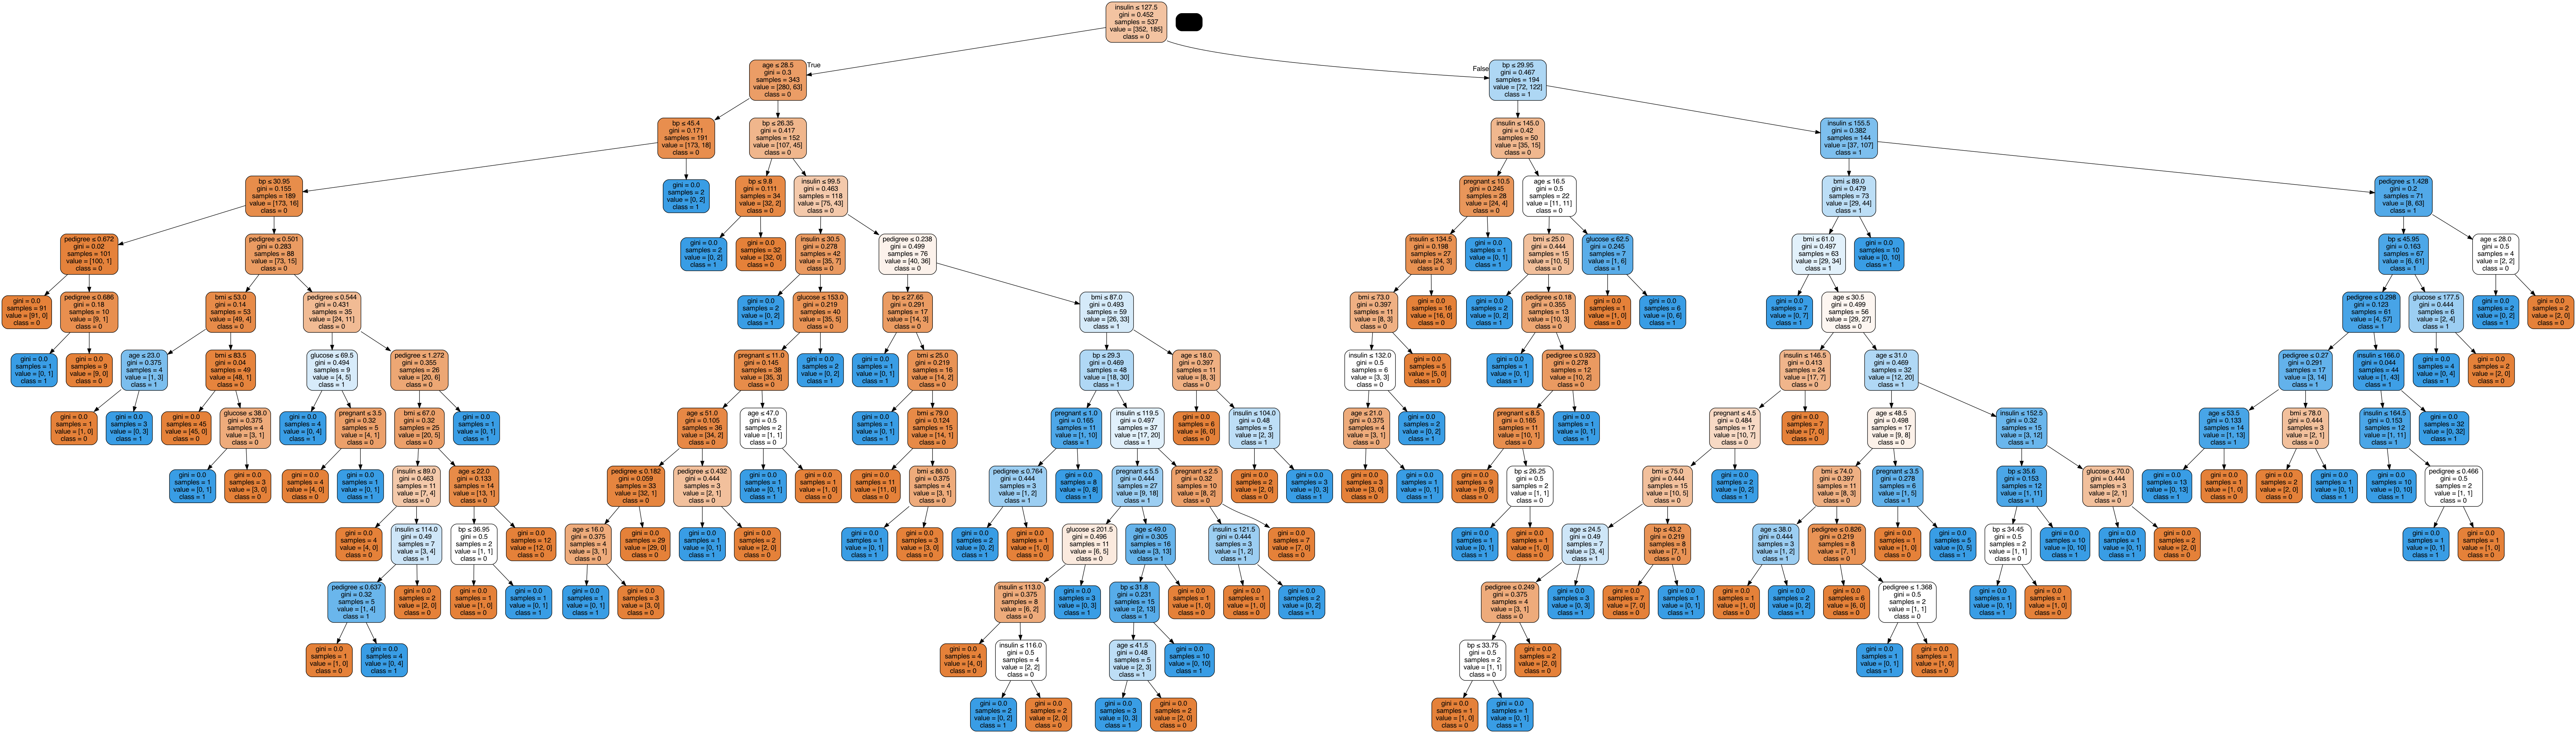

In [9]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names = feature_cols, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('images/diabetes.png')
Image(graph.create_png())

### Optimizing the Model

After the first iteration, we can try out a lot of things which might help our model. These are as follows:

- Criterion: The default is to use Gini impurity which helps us figure out what data should be used to create the parent node. We can use a different criterion by explicitly mentioning it. In a new model, we'll be trying out the Information gain criterion which can be used by just setting criterion="entropy"

- Splitter: This allows us to choose a split strategy. The defualt is the "best", but we can also use random by setting splitter="random" (Those trees are known as Random Forest, we have a separate jupyter notebook for it.)

- Maximum Depth: This allows us to set a maximum depth of the tree. If None, the nodes are expanded until all the leaves contain less than min_samples_split samples. A high value might cause overfitting and a lower one might cause underfitting, so the trick is to find the sweet spot. It can defined by setting max_depth="<Int>"


Let's create another model with criterion set to Information Gain and Maximum depth set to 5.

In [10]:
opt_model = DecisionTreeClassifier(criterion="entropy", max_depth=5)

### Training and Predicting the Outcome

Like before, we have scikit-learn to our rescue as we use one-line codes to fit the model and get the outcome from the test data

In [11]:
opt_model = opt_model.fit(x_train, y_train)
y_pred = opt_model.predict(x_test)

### Calculating Accuracy

Finally, we calculate the accuracy of the new model.

In [12]:
acc_opt = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy of the optimized Decision tree model: {acc_opt:.2f}')

Accuracy of the optimized Decision tree model: 0.71


### Visualizing the Model

As before, we can the new model as well.

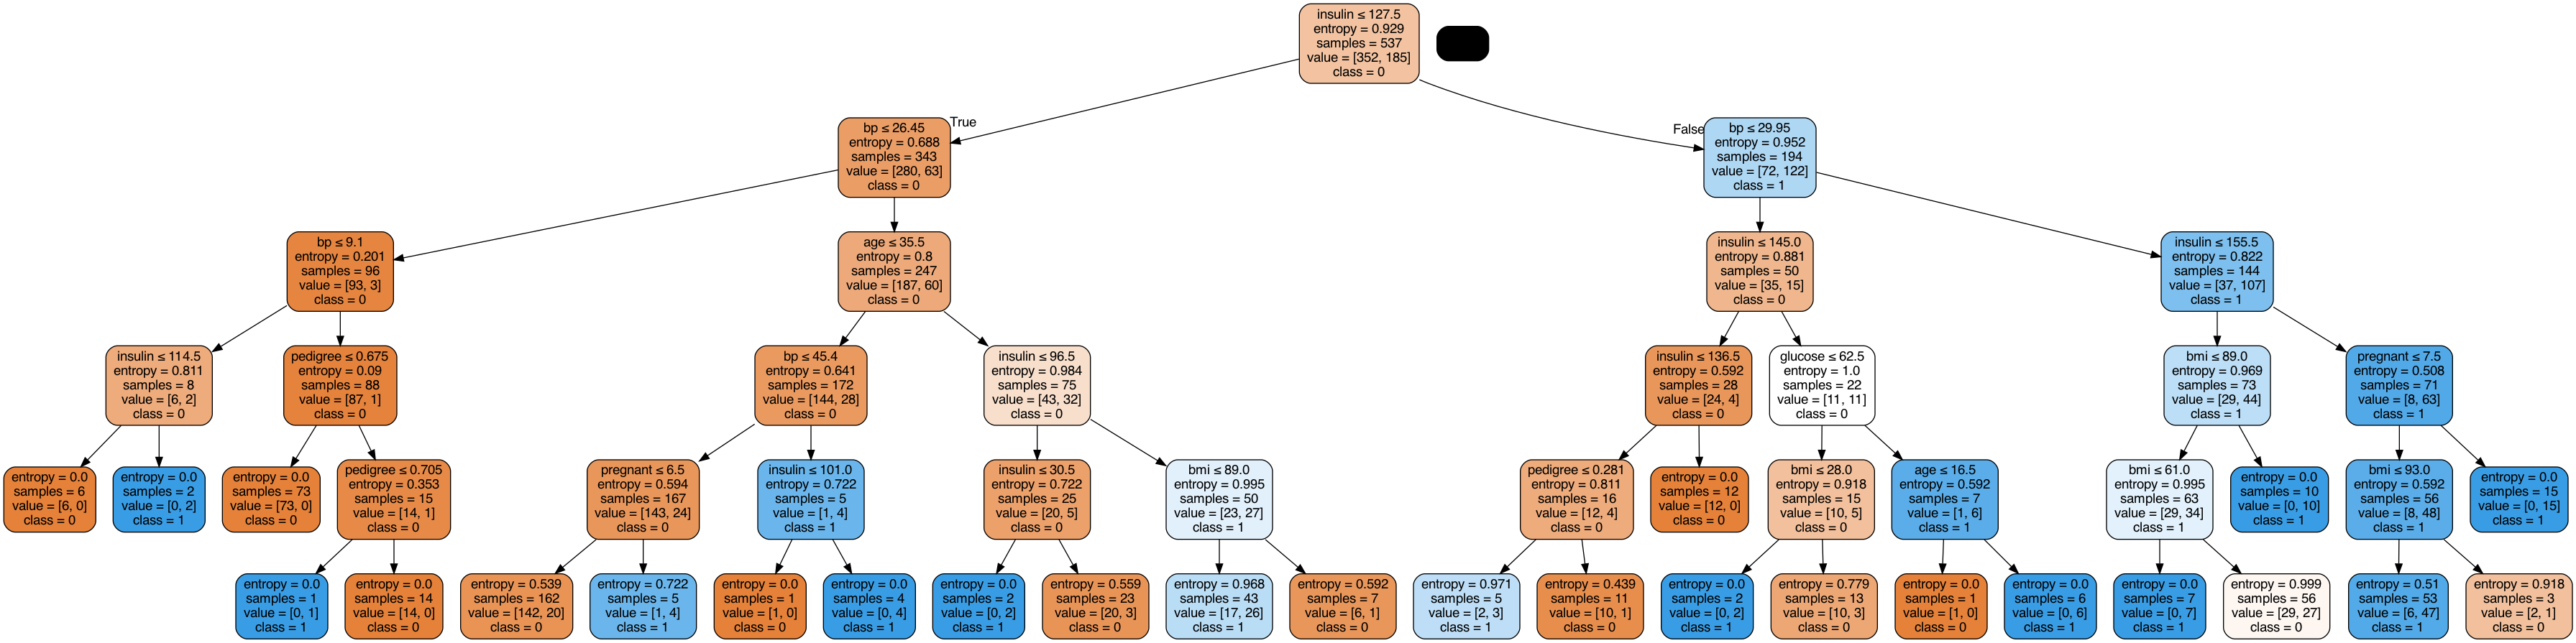

In [13]:
#Visualizing the tree
dot_data = StringIO()
export_graphviz(opt_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('images/updated-diabetes.png')
Image(graph.create_png())

# That's it!

Voila! The Decision Tree Classifer model is created, trained, and tested.